## Connecting with Google drive

In [17]:
from google.colab import drive

drive.mount('/content/drive')
#root_path = 'drive/My Drive/Lab/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!pip install --no-cache-dir git+https://github.com/albu/albumentations > /dev/null && echo "Albumentation library is successfully installed!"
# !git clone https://github.com/RaviVaishnav20/TSAI-EVA5/tree/master/API
# import sys
# sys.path.append("API")


  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-mbkaoonn
Albumentation library is successfully installed!


## Select current working directory or folder

In [19]:
import os
print("Current working directory: "+os.getcwd())
default_path = '/content/drive/My Drive/Lab/API'
os.chdir(default_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content/drive/My Drive/Lab/API
Current working directory: /content/drive/My Drive/Lab/API


## Import Support files and packages

In [26]:
from utils import *
# from image_transform import ImageTransform
from loader import Loader
from graph_plot import *
from test import TestModel
from train import TrainModel
from display_images import *
from train_network import *

In [27]:
from Albumentationtransform import AlbumentationTransforms
import albumentations as A
import cv2

## Split tiny imagenet data 


In [28]:
channel_means  =  (0.4801, 0.4482, 0.3975)
channel_stdevs  = (0.0791, 0.0768, 0.0806)

# Transforms
# means = np.array(channel_means)
# stdevs = np.array(channel_stdevs)
train_transform = AlbumentationTransforms([       
                                                                
                                      A.HorizontalFlip(p = 0.7),
                                      A.PadIfNeeded(min_height=70, min_width=70, border_mode=4, value=None, mask_value=None, always_apply=False, p=1.0),
                                      A.RandomCrop(64, 64, always_apply=False, p=1.0),
                                      A.Rotate(limit=30, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
                                      A.Normalize(mean=channel_means, std=channel_stdevs),
                                      A.Cutout(num_holes=1, max_h_size=32,max_w_size = 32,p=0.7) 
                                       ])
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])
train_dataset , test_dataset,classes = TinyImageNetDataSet(train_split = 70,test_transforms = test_transform,train_transforms = train_transform)

## Create trainloader and testloader

In [29]:
import train_test_loader
trainloader, testloader = train_test_loader.load(train_dataset,test_dataset,batch_size=256)

## Setup device

In [31]:
# Device
SEED = 1
cuda = torch.cuda.is_available()
print("Cuda is available ?", cuda)
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)
device = torch.device("cuda" if cuda else "cpu")

Cuda is available ? True


## Visualize some image samples

In [32]:
def show_sample_images(train_loader, labels_list, num_imgs=5):
    # get some random training images
    dataiter = iter(train_loader)
    images, labels = dataiter.next()
    # show images
    imshow(torchvision.utils.make_grid(images[:num_imgs]))
    # print labels
    print(' '.join('%5s' % labels_list[labels[j]] for j in range(num_imgs)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


albatross,etc ladybug,etc space heater jellyfish tarantula


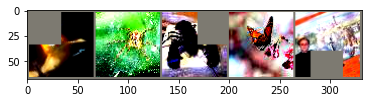

In [34]:
show_sample_images(trainloader, labels_list)

## Load model

In [35]:
import ResnetModel
model = ResnetModel.ResNet18(num_classes=200).to(device)

## Model Summary (Layers and Parameter)

In [15]:
summary(model, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

## Define optimizer, loss function, scheduler and some paths and lists(for plotting and saving graph and images)

In [37]:
IMAGE_PATH = "/content/drive/My Drive/Lab/s12/"
PATH = "/content/drive/My Drive/Lab/s12"
MODEL_PATH = "/content/drive/My Drive/Lab/s12/"
train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []
Max_EPOCHS = 50

In [38]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR,StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.0001,nesterov = True ) 
criterion = nn.CrossEntropyLoss()
scheduler = OneCycleLR(optimizer, max_lr=0.02, total_steps=None, epochs=50, steps_per_epoch=len(trainloader), pct_start=1/3, anneal_strategy='linear', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=10.0,final_div_factor =10)

## Train and Evaluate Network

In [22]:
import train_test
# import evaluate

train_test.train_model(model,device,trainloader,testloader,optimizer,criterion,50,scheduler,batch_scheduler=True,best_acc = 0,path = MODEL_PATH+"s12_model.pt")

EPOCH: 1 LR: 0.002




Test set: Average loss: 0.0172, Accuracy: 2817/33000 (8.54%)

accuracy increased, Saving model....
EPOCH: 2 LR: 0.0030802153253140165




Test set: Average loss: 0.0152, Accuracy: 5001/33000 (15.15%)

accuracy increased, Saving model....
EPOCH: 3 LR: 0.004160430650628033




Test set: Average loss: 0.0144, Accuracy: 6238/33000 (18.90%)

accuracy increased, Saving model....
EPOCH: 4 LR: 0.00524064597594205




Test set: Average loss: 0.0132, Accuracy: 7714/33000 (23.38%)

accuracy increased, Saving model....
EPOCH: 5 LR: 0.006320861301256066




Test set: Average loss: 0.0129, Accuracy: 8328/33000 (25.24%)

accuracy increased, Saving model....
EPOCH: 6 LR: 0.007401076626570082




Test set: Average loss: 0.0134, Accuracy: 8144/33000 (24.68%)

EPOCH: 7 LR: 0.008481291951884098




Test set: Average loss: 0.0119, Accuracy: 9895/33000 (29.98%)

accuracy increased, Saving model....
EPOCH: 8 LR: 0.009561507277198115




Test set: Average loss: 0.0115, Accuracy: 10614/33000 (32.16%)

accuracy increased, Saving model....
EPOCH: 9 LR: 0.010641722602512131




Test set: Average loss: 0.0120, Accuracy: 9841/33000 (29.82%)

EPOCH: 10 LR: 0.011721937927826147




Test set: Average loss: 0.0110, Accuracy: 11444/33000 (34.68%)

accuracy increased, Saving model....
EPOCH: 11 LR: 0.012802153253140163




Test set: Average loss: 0.0106, Accuracy: 12243/33000 (37.10%)

accuracy increased, Saving model....
EPOCH: 12 LR: 0.013882368578454181




Test set: Average loss: 0.0115, Accuracy: 11199/33000 (33.94%)

EPOCH: 13 LR: 0.014962583903768197




Test set: Average loss: 0.0100, Accuracy: 13208/33000 (40.02%)

accuracy increased, Saving model....
EPOCH: 14 LR: 0.016042799229082215




Test set: Average loss: 0.0102, Accuracy: 12765/33000 (38.68%)

EPOCH: 15 LR: 0.01712301455439623




Test set: Average loss: 0.0109, Accuracy: 12441/33000 (37.70%)

EPOCH: 16 LR: 0.018203229879710243




Test set: Average loss: 0.0099, Accuracy: 13750/33000 (41.67%)

accuracy increased, Saving model....
EPOCH: 17 LR: 0.019283445205024265




Test set: Average loss: 0.0098, Accuracy: 13895/33000 (42.11%)

accuracy increased, Saving model....
EPOCH: 18 LR: 0.019800026578073088




Test set: Average loss: 0.0089, Accuracy: 15100/33000 (45.76%)

accuracy increased, Saving model....
EPOCH: 19 LR: 0.01920602657807309




Test set: Average loss: 0.0097, Accuracy: 14077/33000 (42.66%)

EPOCH: 20 LR: 0.01861202657807309




Test set: Average loss: 0.0091, Accuracy: 15077/33000 (45.69%)

EPOCH: 21 LR: 0.01801802657807309




Test set: Average loss: 0.0089, Accuracy: 15571/33000 (47.18%)

accuracy increased, Saving model....
EPOCH: 22 LR: 0.017424026578073088




Test set: Average loss: 0.0087, Accuracy: 15537/33000 (47.08%)

EPOCH: 23 LR: 0.016830026578073087




Test set: Average loss: 0.0088, Accuracy: 15552/33000 (47.13%)

EPOCH: 24 LR: 0.01623602657807309




Test set: Average loss: 0.0092, Accuracy: 15146/33000 (45.90%)

EPOCH: 25 LR: 0.01564202657807309




Test set: Average loss: 0.0087, Accuracy: 16057/33000 (48.66%)

accuracy increased, Saving model....
EPOCH: 26 LR: 0.015048026578073088




Test set: Average loss: 0.0083, Accuracy: 16512/33000 (50.04%)

accuracy increased, Saving model....
EPOCH: 27 LR: 0.01445402657807309




Test set: Average loss: 0.0080, Accuracy: 17092/33000 (51.79%)

accuracy increased, Saving model....
EPOCH: 28 LR: 0.013860026578073089




Test set: Average loss: 0.0088, Accuracy: 16219/33000 (49.15%)

EPOCH: 29 LR: 0.01326602657807309




Test set: Average loss: 0.0086, Accuracy: 16483/33000 (49.95%)

EPOCH: 30 LR: 0.012672026578073089




Test set: Average loss: 0.0083, Accuracy: 17010/33000 (51.55%)

EPOCH: 31 LR: 0.01207802657807309




Test set: Average loss: 0.0083, Accuracy: 16846/33000 (51.05%)

EPOCH: 32 LR: 0.011484026578073089




Test set: Average loss: 0.0083, Accuracy: 17069/33000 (51.72%)

EPOCH: 33 LR: 0.010890026578073088




Test set: Average loss: 0.0082, Accuracy: 17174/33000 (52.04%)

accuracy increased, Saving model....
EPOCH: 34 LR: 0.01029602657807309




Test set: Average loss: 0.0084, Accuracy: 16850/33000 (51.06%)

EPOCH: 35 LR: 0.009702026578073088




Test set: Average loss: 0.0080, Accuracy: 17624/33000 (53.41%)

accuracy increased, Saving model....
EPOCH: 36 LR: 0.00910802657807309




Test set: Average loss: 0.0083, Accuracy: 17340/33000 (52.55%)

EPOCH: 37 LR: 0.008514026578073089




Test set: Average loss: 0.0083, Accuracy: 17188/33000 (52.08%)

EPOCH: 38 LR: 0.007920026578073088




Test set: Average loss: 0.0080, Accuracy: 17938/33000 (54.36%)

accuracy increased, Saving model....
EPOCH: 39 LR: 0.007326026578073087




Test set: Average loss: 0.0078, Accuracy: 18006/33000 (54.56%)

accuracy increased, Saving model....
EPOCH: 40 LR: 0.00673202657807309




Test set: Average loss: 0.0080, Accuracy: 17821/33000 (54.00%)

EPOCH: 41 LR: 0.006138026578073089




Test set: Average loss: 0.0081, Accuracy: 17742/33000 (53.76%)

EPOCH: 42 LR: 0.005544026578073088




Test set: Average loss: 0.0078, Accuracy: 18314/33000 (55.50%)

accuracy increased, Saving model....
EPOCH: 43 LR: 0.004950026578073087




Test set: Average loss: 0.0079, Accuracy: 18411/33000 (55.79%)

accuracy increased, Saving model....
EPOCH: 44 LR: 0.004356026578073088




Test set: Average loss: 0.0077, Accuracy: 18522/33000 (56.13%)

accuracy increased, Saving model....
EPOCH: 45 LR: 0.0037620265780730876




Test set: Average loss: 0.0078, Accuracy: 18482/33000 (56.01%)

EPOCH: 46 LR: 0.003168026578073087




Test set: Average loss: 0.0075, Accuracy: 18786/33000 (56.93%)

accuracy increased, Saving model....
EPOCH: 47 LR: 0.002574026578073086




Test set: Average loss: 0.0076, Accuracy: 18825/33000 (57.05%)

accuracy increased, Saving model....
EPOCH: 48 LR: 0.0019800265780730887




Test set: Average loss: 0.0074, Accuracy: 19132/33000 (57.98%)

accuracy increased, Saving model....
EPOCH: 49 LR: 0.001386026578073088




Test set: Average loss: 0.0073, Accuracy: 19244/33000 (58.32%)

accuracy increased, Saving model....
EPOCH: 50 LR: 0.0007920265780730872




Test set: Average loss: 0.0073, Accuracy: 19287/33000 (58.45%)

accuracy increased, Saving model....


## Show and Save losses and accuracy Plot

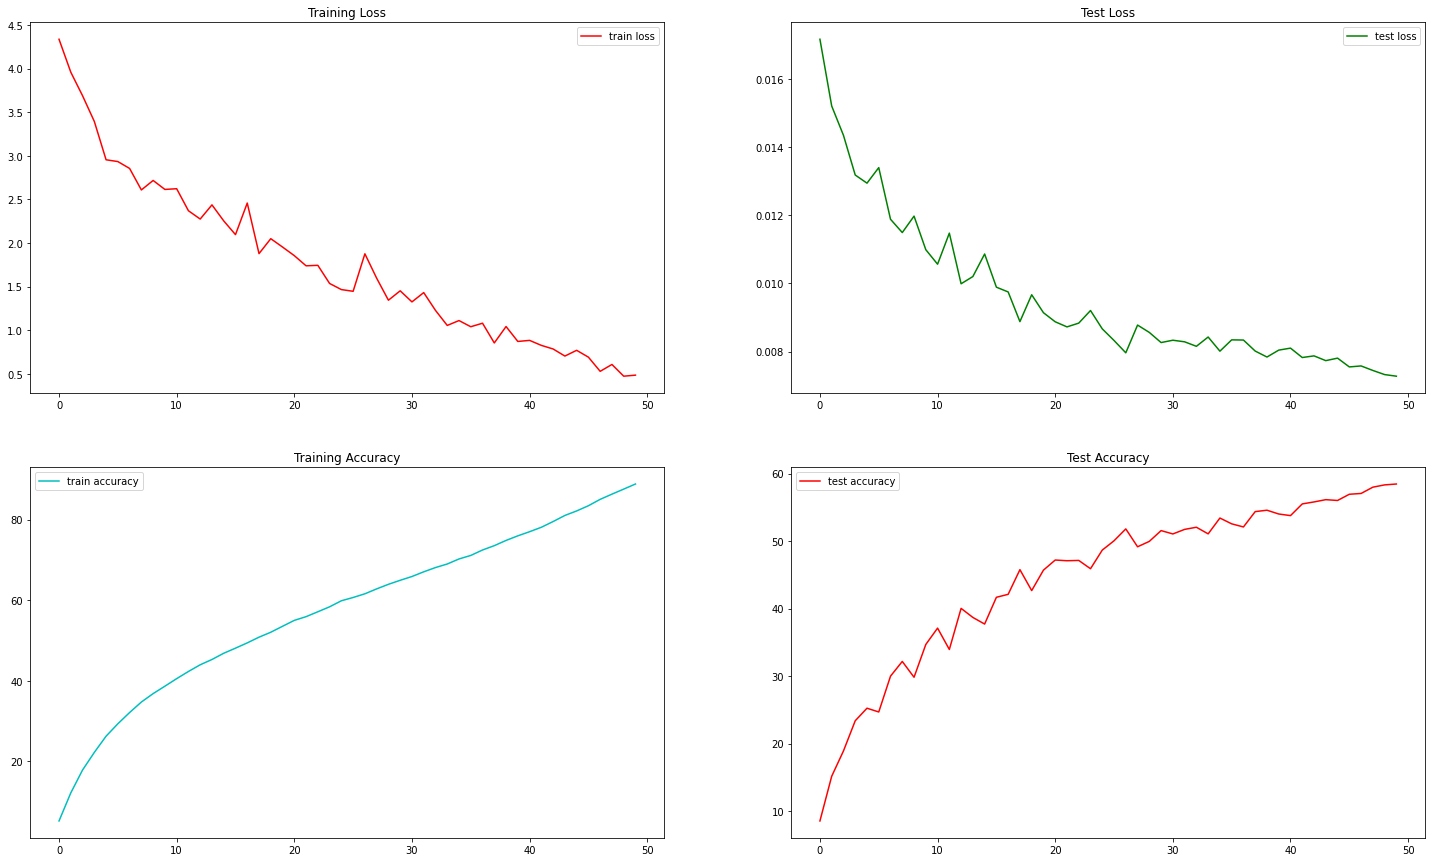

In [23]:
getPlottedGraph(Max_EPOCHS, train_test.train_losses, train_test.train_acc, train_test.test_losses, train_test.test_acc,name="S12A_plot", PATH=PATH+str("/visualization/"))

## Load trained model and Checkpoints

In [39]:
checkpoint = torch.load( MODEL_PATH+"s12_model.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

## Create classes list

In [55]:
url = "tiny-imagenet-200/words.txt"
f = open(url, "r")
words = [None] * 200
for line in f:
  wordclass = line.strip('\n').split('\t')[0]

  if wordclass in classes:
    i = classes.index(line.strip('\n').split('\t')[0])
    words[i] = line.strip('\n').split('\t')[1]

In [65]:
new_words =[]
for word in words:
  if ", " in word:
    a = word.find(',')
    b = word[0:a]
    new_words.append(b+" etc")
  else:
    new_words.append(word)
print(new_words)

['Egyptian cat', 'reel', 'volleyball', 'rocking chair etc', 'lemon', 'bullfrog etc', 'basketball', 'cliff etc', 'espresso', 'plunger etc', 'parking meter', 'German shepherd etc', 'dining table etc', 'monarch etc', 'brown bear etc', 'school bus', 'pizza etc', 'guinea pig etc', 'umbrella', 'organ etc', 'oboe etc', 'maypole', 'goldfish etc', 'potpie', 'hourglass', 'seashore etc', 'computer keyboard etc', 'Arabian camel etc', 'ice cream etc', 'nail', 'space heater', 'cardigan', 'baboon', 'snail', 'coral reef', 'albatross etc', 'spider web etc', 'sea cucumber etc', 'backpack etc', 'Labrador retriever', 'pretzel', 'king penguin etc', 'sulphur butterfly etc', 'tarantula', 'lesser panda etc', 'pop bottle etc', 'banana', 'sock', 'cockroach etc', 'projectile etc', 'beer bottle', 'mantis etc', 'freight car', 'guacamole', 'remote control etc', 'European fire salamander etc', 'lakeside etc', 'chimpanzee etc', 'pay-phone etc', 'fur coat', 'alp', 'lampshade etc', 'torch', 'abacus', 'moving van', 'bar

## Show and Save correct classified images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

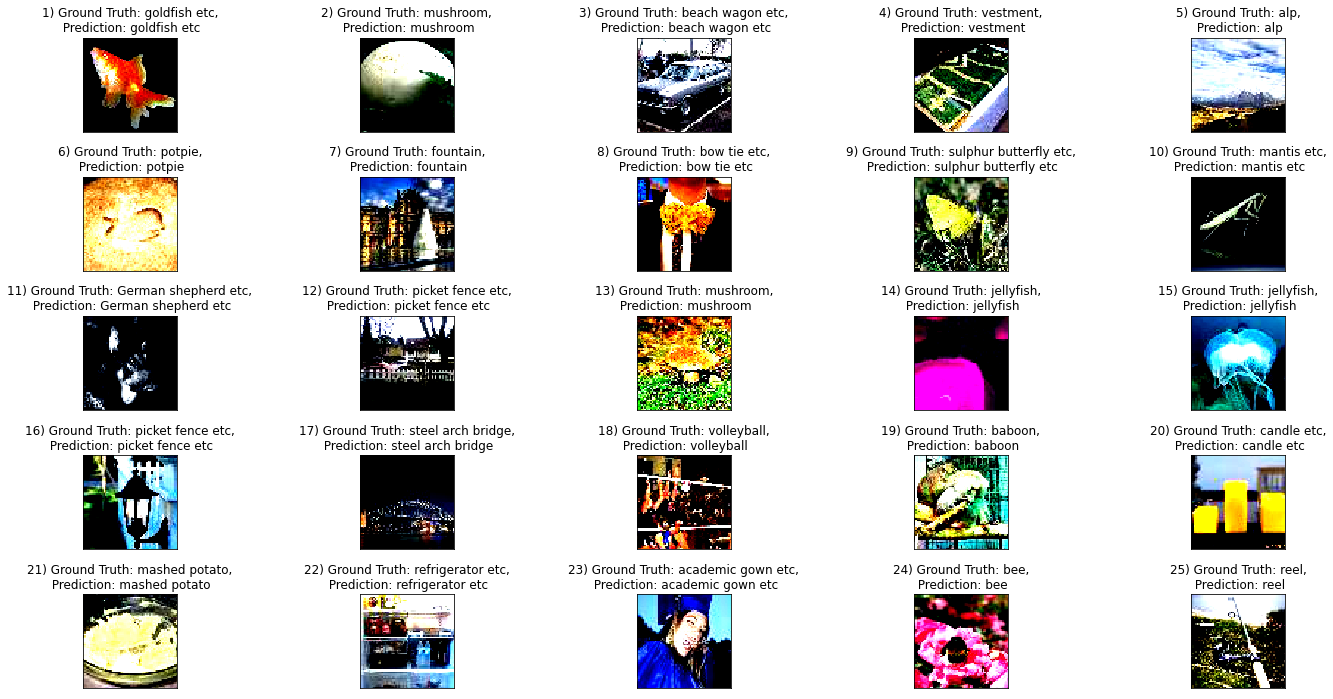

In [68]:
show_save_correctly_classified_images(model, testloader, device, PATH, name="correct_pred", is_cifar10=False, labels_list=new_words)

## Show and Save misclassified images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

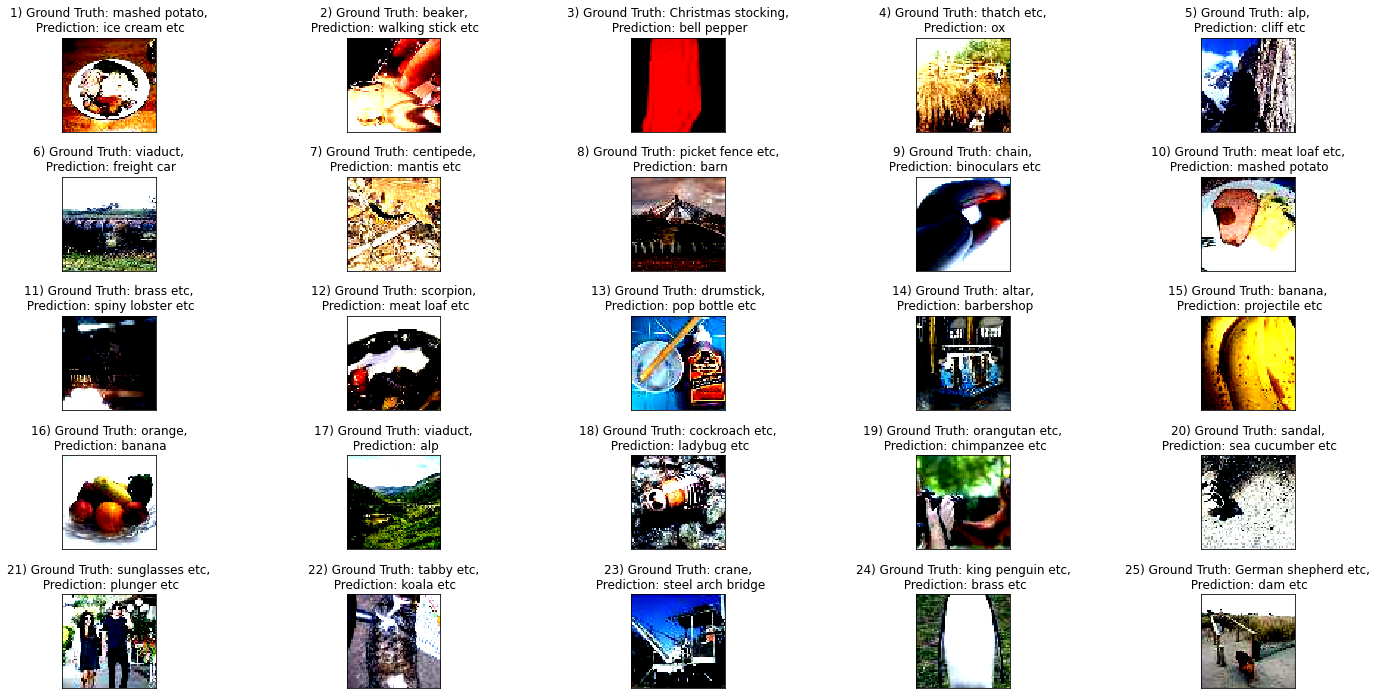

In [69]:
show_save_misclassified_images(model, testloader, device, PATH, name="misclassified_pred", is_cifar10=False, labels_list=new_words)

## Grad Cam

In [71]:
from grad_cam import *

In [70]:
misclassified_imgs, correctly_classified_images = classify_images(model, testloader, device, 25)

In [74]:
layers_list = ["layer1","layer2","layer3","layer4"]
display_gradcam = VisualizeCam(model, new_words, layers_list)

### Top 5 Correct classified image GradCam 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

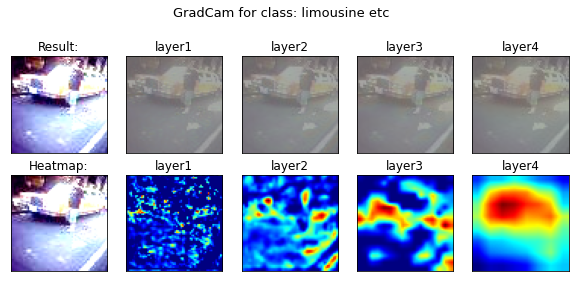

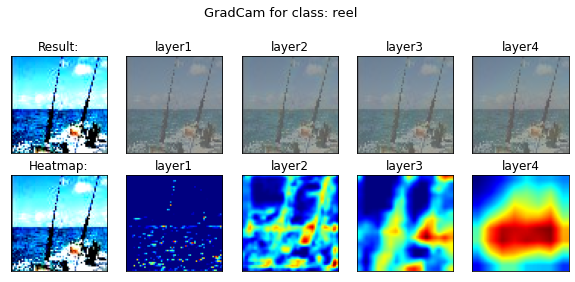

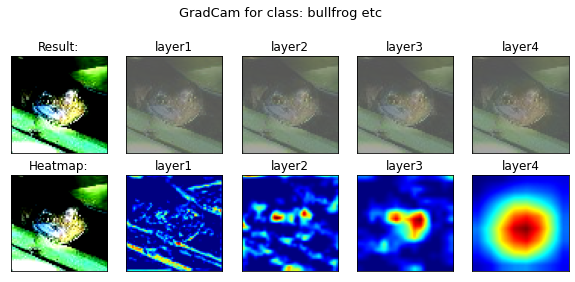

In [75]:
correct_pred_imgs = []
for i in range(len(correctly_classified_images)):
  correct_pred_imgs.append(torch.as_tensor(correctly_classified_images[i]["img"]))
display_gradcam(torch.stack(correct_pred_imgs), layers_list, PATH+str("/visualization"), metric="correct")

### Top 5 misclassifeid image GradCam 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

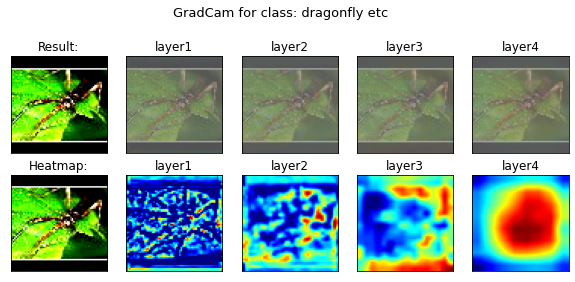

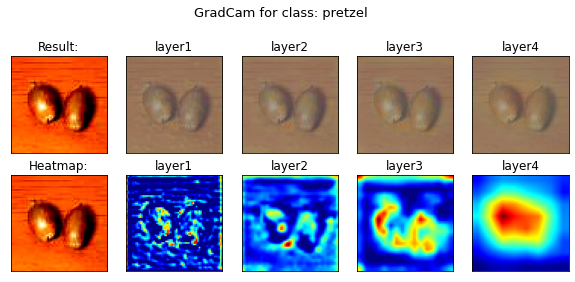

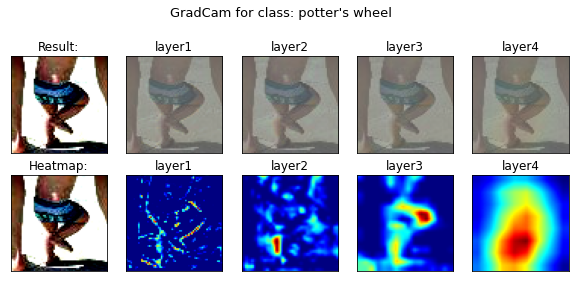

In [76]:
misclassify_pred_imgs = []
for i in range(len(misclassified_imgs)):
  misclassify_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
display_gradcam(torch.stack(misclassify_pred_imgs), layers_list, PATH+str("/visualization"), metric="misclassify")

### 25 misclassified images GradCam

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

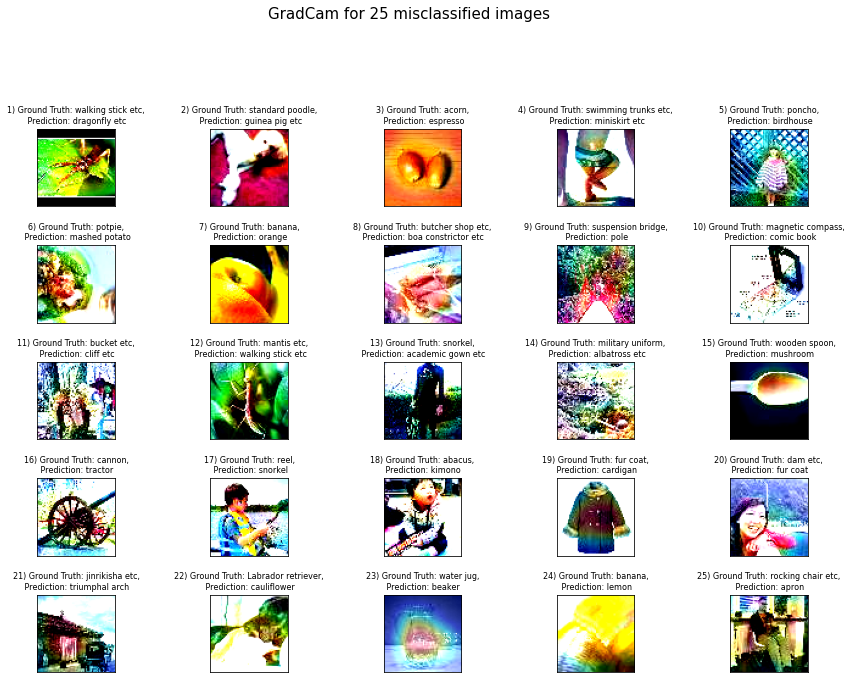

In [78]:
display_gradcam.plot_img_heatmap(misclassified_imgs, layers_list, PATH+"/visualization", target_inds=None, metric="", name="gradcam_misclassified_images")